
SPY



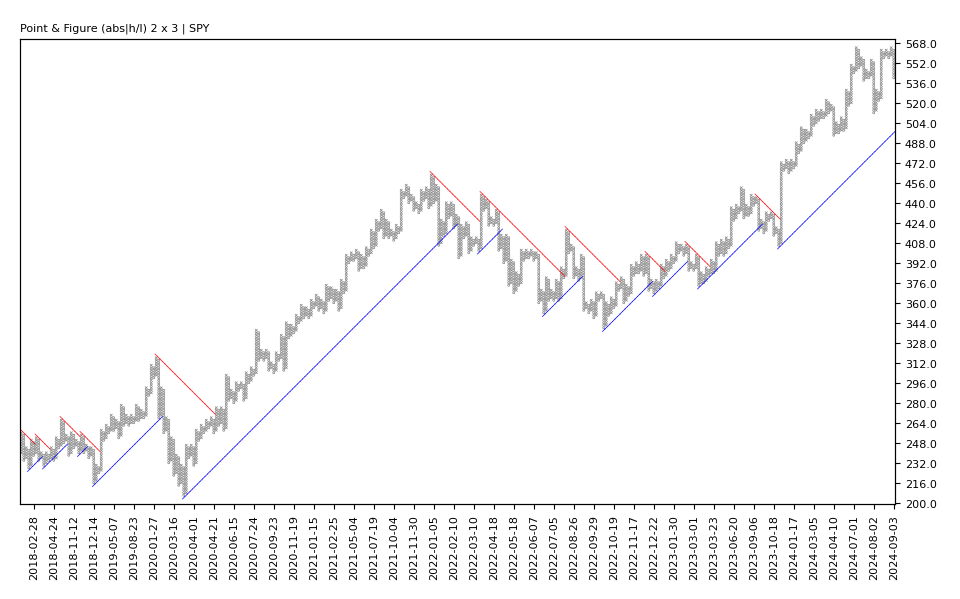

In [1]:
from pypnf import PointFigureChart
import datetime, matplotlib as mpl, numpy as np, pandas as pd, yfinance as yf

pnf = { }

TestPyPnFCounts = False

symbols = ['SPY']
Today = datetime.date.today().strftime('%Y-%m-%d')  

for symbol in symbols:

    print(f"\n{symbol}\n")
    data = yf.Ticker(symbol)
    ts = data.history(start='2018-01-01', end=Today, period='1d')
 
    # reset index
    ts.reset_index(level=0, inplace=True)

    # convert pd.timestamp to string
    ts['Date'] = ts['Date'].dt.strftime('%Y-%m-%d')

    # select required keys
    ts = ts[['Date','Open','High','Low','Close']]

    # convert DataFrame to dictionary
    ts = ts.to_dict('list')

    pnf = PointFigureChart(ts=ts, method='h/l', reversal=3, boxsize=2, scaling='abs', title=symbol)
    
    if TestPyPnFCounts is True: 

        pnf.show_breakouts = True
        pnf.show_counts = True
        pnf.get_counts()

        dfPnFBreakouts = pd.DataFrame.from_dict(pnf.breakouts)
        display(dfPnFBreakouts)

        dfPnFCounts = pd.DataFrame.from_dict(pnf.counts)
        display(dfPnFCounts[['trend','box index', 'length', 'type','target', 'reward', 'risk 1', 'risk 2']])

        print(pnf.ts['date'])
        print(pnf.time_step)

        print(pnf)

    else:

        pnf.get_trendlines(length=4, mode='weak')
        pnf.show_trendlines = 'external'

        pnf.show()



Compare generated chart above to below input and output (as expected - see permalink https://schrts.co/RzgbDmGQ (live chart)).

2024-09-08 Screenshot corresponding to above chart generated with PyPnf:

![Screenshot 2024-09-08 at 1.03.48 PM.png](<attachment:Screenshot 2024-09-08 at 1.03.48 PM.png>)
![Screenshot 2024-09-08 at 1.05.33 PM.png](<attachment:Screenshot 2024-09-08 at 1.05.33 PM.png>)
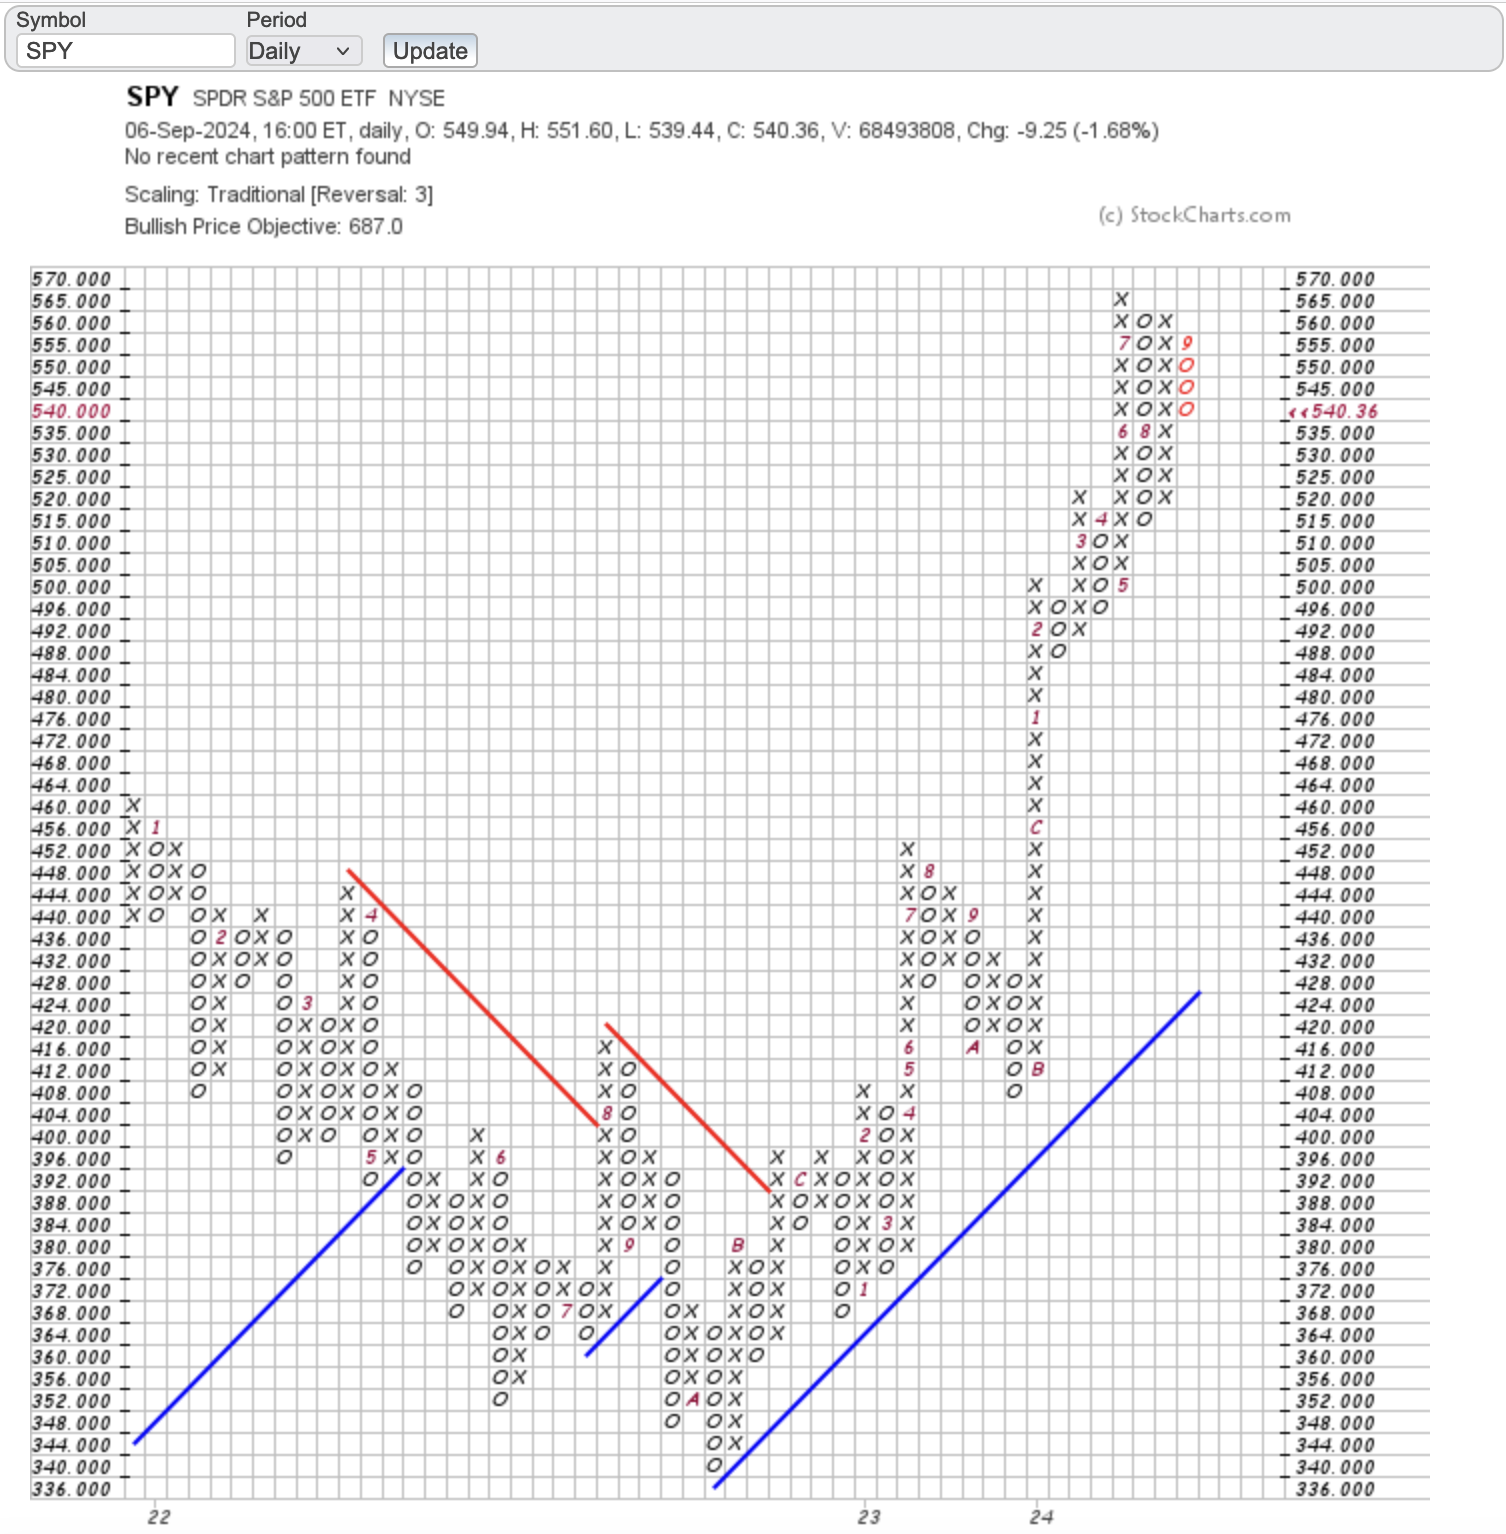
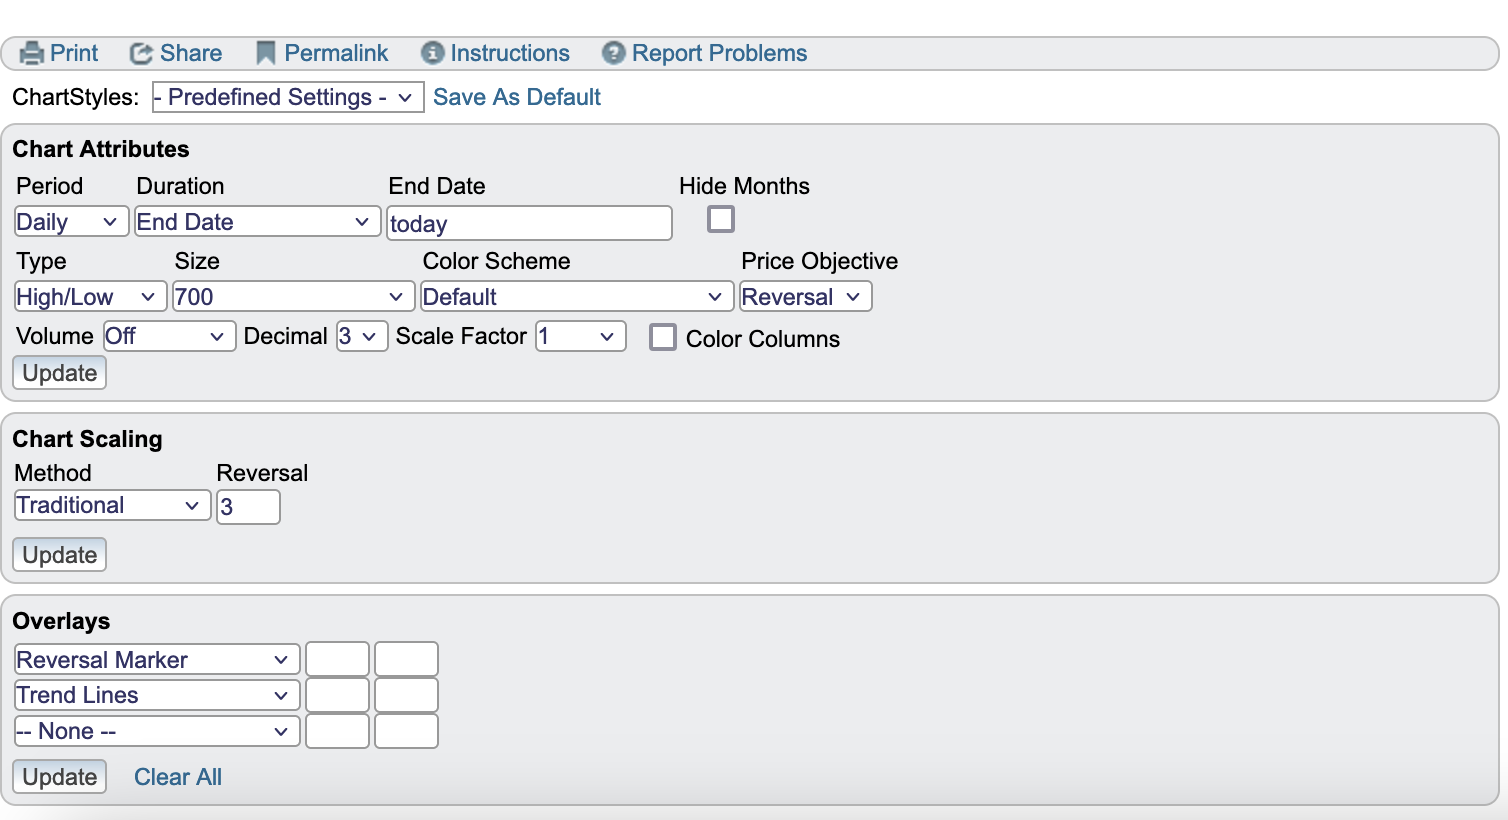